In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [157]:
# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

#### Problem Statement:

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.

#### Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

#### Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 


# Common Functions

1. **[DateFrame Describe](#my_describe)**
2. **[Highlight](#highlight)**


# Contents

1. **[DataSet Description](#df_des)**
2. **[Value Counts](#val_count)**
3. **[Changing DataType](#change_dtype)**
4. **[Data Cleaning](#data_clean)**<br>

    - 4.1 - **[Mapping Boolean to Numbers](#map)**<br>
    - 4.2 - **[Null Value Check](#null)**<br>
    - 4.3 - **[Duplicates Check](#duplicates)**<br>
    - 4.4 - **[Dropping Duplicates](#drop_dup)**<br>
    - 4.5 - **[Outlier Check and Treatement](#outlier)**<br>
    
5. **[Graphical Representation](#graph)**

    - 5.1 **[Univariate Analysis_Categorical Column](#univariate_cat)**<br>
        - 5.1.1 **[Insights](#insights_cat)** 
        
    - 5.2 **[Univariate Analysis_Numerical Column](#univariate_num)**<br>
        - 5.2.1 **[Insights](#insights_num)**            
    - 5.3 **[Bivariate Analysis - Numerical and Target(Revenue)](#bivariate_num)**
        - 5.3.1 **[Insights](#insights_bi_num)**
        
    - 5.4 **[Bivariate Analysis - Categorical and Target(Revenue)](#bivariate_cat)**
        - 5.4.1 **[Insights](#insights_bi_cat)**   
        
    - 5.5 **[Correlation Plot](#heat_map)**
        - 5.5.1 **[Insights](#insights_corr_plot)**
        
6. **[Eliminating Feature(s) based on the EDA performed](#elim_col)**

7. **[Scaling - Standard Scaler](#scale)**

8. **[Principal Component Analysis (PCA)](#pca)**

    - 8.1 **[Covariance Matrix](#cov_mat)**
    - 8.2 **[Compute Eigenvalues and Eigenvectors](#eigen)**
    - 8.3 **[Decide Number of Principal Components](#components)**
    - 8.4 **[Principal Components](#comp)**

9. **[Dataset after Dimensionality Reduction](#ds_dim)**

10. **[Hierarchical Clustering - Agglomerative](#hierar)**

    - 10.1 **[Silhouette Score Method - Optimal Cluster Number](#silhouette)**
    - 10.2 **[Retrieve the Clusters](#retrieve_clusters)**
    
11. **[Analyze the Clusters](#ana_clusters)**

    - 11.1 **[Analyze Cluster_0](#clus_0)**
    - 11.2 **[Analyze Cluster_1](#clus_1)**
    
12. **[Finding the best model for each clusters using PyCaret](#best_model)**

<a id = "my_describe"></a>
#### 1. DataFrame Describe

In [3]:
def dataframe_mydescribe(my_df):
    
    #DataTypes
    
    my_df_dtypes =  my_df.dtypes.to_frame().reset_index()
    my_df_dtypes.rename({'index':'Column_Name' , 0 : 'Data_type'}, axis = 'columns', inplace = True)
    
    #Unique
    
    my_df_unique =  my_df.apply(lambda x: len(x.unique())).to_frame().reset_index()
    my_df_unique.rename({'index':'Column_Name' , 0 : 'Unique_count'}, axis = 'columns', inplace = True)
    
    #Is Null and percentage
    
    my_df_isnull =  my_df.isnull().sum().to_frame().reset_index()
    my_df_isnull.rename({'index':'Column_Name' , 0 : 'Null_count'}, axis = 'columns', inplace = True)
    my_df_isnull['perc_null'] =  my_df_isnull['Null_count'] / len(my_df) * 100
    

    #Merging the above columns
    
    my_df_info = pd.merge(my_df_dtypes, my_df_unique, on = ['Column_Name'], how = 'inner').merge(my_df_isnull, on = ['Column_Name'], how = 'inner' )
    
    return(my_df_info.sort_values(by = 'perc_null', ascending = False).reset_index(drop = True))

<a id = "highlight"></a>
### 2. Highlight

In [4]:
def highlight_cols(s):
    return 'background-color: % s' % 'yellow'

In [5]:
df_online_shopper = pd.read_csv("online_shoppers_intention.csv")

In [6]:
df_online_shopper.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df_os = df_online_shopper.copy()

In [8]:
df_os.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df_os.shape

(12330, 18)

<a id = 'df_des'></a>
## 1. DataSet Description

In [10]:
dataframe_mydescribe(df_os)

,Column_Name,Data_type,Unique_count,Null_count,perc_null
0,Administrative,int64,27,0,0.0
1,Administrative_Duration,float64,3335,0,0.0
2,Weekend,bool,2,0,0.0
3,VisitorType,object,3,0,0.0
4,TrafficType,int64,20,0,0.0
5,Region,int64,9,0,0.0
6,Browser,int64,13,0,0.0
7,OperatingSystems,int64,8,0,0.0
8,Month,object,10,0,0.0
9,SpecialDay,float64,6,0,0.0


<a id = 'val_count'></a>
## 2. Value Counts

**Value Counts for columns to understand the data**

In [11]:
all_col = df_os.columns
all_col

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [12]:
for col in all_col:
    print("\033[1mValue counts for the column: ", col, "\033[0m")
    print()
    print(df_os[col].value_counts())
    print("\033[1m-------------------------------------------------------------\033[0m")
    print()

Value counts for the column:  Administrative 

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
22       4
24       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
-------------------------------------------------------------

Value counts for the column:  Administrative_Duration 

0.000000       5903
4.000000         56
5.000000         53
7.000000         45
11.000000        42
               ... 
398.572712        1
390.870000        1
62.750000         1
1097.016667       1
398.066667        1
Name: Administrative_Duration, Length: 3335, dtype: int64
-------------------------------------------------------------

Value counts for the column:  Informational 

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10   

In [13]:
len(df_os['Revenue'].value_counts())

2

In [14]:
len(df_os['Browser'].value_counts())

13

In [15]:
len(df_os['TrafficType'].value_counts())

20

## Value counts for columns having values lesser than 13

In [16]:
for col in all_col:    
    if len(df_os[col].value_counts()) <=12:
        print("\033[1mValue counts for the column: ", col, "\033[0m")
        print()        
        print(df_os[col].value_counts())
        print("\033[1m-------------------------------------------------------------\033[0m")
        print()

Value counts for the column:  SpecialDay 

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64
-------------------------------------------------------------

Value counts for the column:  Month 

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
-------------------------------------------------------------

Value counts for the column:  OperatingSystems 

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
-------------------------------------------------------------

Value counts for the column:  Region 

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
-------------------------------------------------------------

Value counts for the column:  VisitorType 

Returning_Visitor    10551
New_Visit

**Inference:**

* SpecialDay, Month, OperatingSystems,Region, VisitorType, Weekend and Revenue has less value counts and can be considered as object

* TrafficType, Browser should also be considered as object dtype

* Revenue and Weekend contains 'False' and 'True' can be mapped to 0 and 1.

<a id = 'change_dtype'></a>
## 3. Changing DataType

**Changing the data type for the columns - SpecialDay, Month, OperatingSystems,Region, VisitorType**

In [17]:
df_os_1 = df_os.copy()

In [18]:
df_os_1['SpecialDay'] = df_os_1['SpecialDay'].astype('object')
df_os_1['Month'] = df_os_1['Month'].astype('object')
df_os_1['OperatingSystems'] = df_os_1['OperatingSystems'].astype('object')
df_os_1['Region'] = df_os_1['Region'].astype('object')
df_os_1['VisitorType'] = df_os_1['VisitorType'].astype('object')
df_os_1['TrafficType'] = df_os_1['TrafficType'].astype('object')
df_os_1['Browser'] = df_os_1['Browser'].astype('object')

<a id = 'data_clean'></a>
## 4. Data Cleaning

<a id = 'map'> </a>
### 4.1 Mapping Boolean to Numbers

**Mapping 1 and 0 to 'Revenue' and 'Weekend' column**

In [19]:
#As Revenue and Weekend is in boolean

In [20]:
map_bool = {False:'0' , True:'1'}

In [21]:
df_os_1['Revenue'] = df_os_1['Revenue'].map(map_bool)
df_os_1['Weekend'] = df_os_1['Weekend'].map(map_bool)

In [22]:
df_os_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [23]:
dataframe_mydescribe(df_os_1)

,Column_Name,Data_type,Unique_count,Null_count,perc_null
0,Administrative,int64,27,0,0.0
1,Administrative_Duration,float64,3335,0,0.0
2,Weekend,object,2,0,0.0
3,VisitorType,object,3,0,0.0
4,TrafficType,object,20,0,0.0
5,Region,object,9,0,0.0
6,Browser,object,13,0,0.0
7,OperatingSystems,object,8,0,0.0
8,Month,object,10,0,0.0
9,SpecialDay,object,6,0,0.0


<a id = 'null'></a>
### 4.2 Null Value Check



* There are no null values present in the dataframe

In [24]:
df_os_1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<a id = 'duplicates'></a>
### 4.3 Duplicates Check

In [25]:
df_os_1.shape

(12330, 18)

In [26]:
df_os_1.duplicated().sum()

125

In [27]:
#Sample checking for duplicates record

In [28]:
df_os_1[df_os_1.duplicated(keep = False)].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,0,0
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,0,0
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0


In [29]:
df_os_1[df_os_1.duplicated(keep = False)].head().style.applymap(highlight_cols, subset = pd.IndexSlice[[85,158],:])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,3,Returning_Visitor,0,0
132,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,3,2,3,3,Returning_Visitor,0,0
158,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,3,Returning_Visitor,0,0
159,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,3,2,3,3,Returning_Visitor,0,0
178,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,3,2,3,3,Returning_Visitor,0,0


<a id = 'drop_dup'></a>
### 4.4 Dropping Duplicates

In [30]:
df_os_nondup = df_os_1.copy()

In [31]:
df_os_nondup.drop_duplicates(inplace = True)

In [32]:
df_os_nondup.shape

(12205, 18)

In [33]:
df_os_nondup.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [34]:
df_os_nondup.duplicated().sum()

0

<a id = 'outlier'></a>
### 4. 5 Outlier Check and Treatement

In [35]:
num_col = df_os_nondup.select_dtypes(include = [np.number]).columns
num_col

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

In [36]:
len(num_col)

9

In [37]:
#Considering 3SD for the outliers check in IQR method

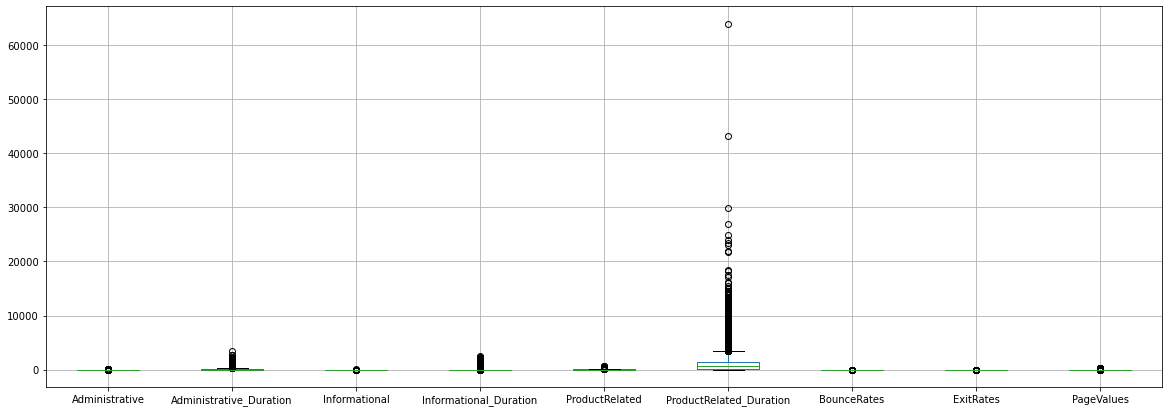

In [38]:
plt.figure(figsize = (20,7))
df_os_nondup.boxplot()
plt.show()

For the Column -  Administrative 


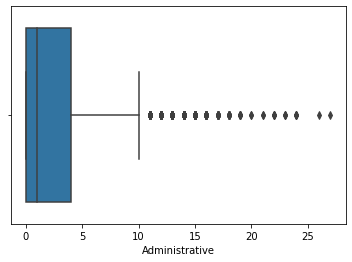

-------------------------------------------------------------


For the Column -  Administrative_Duration 


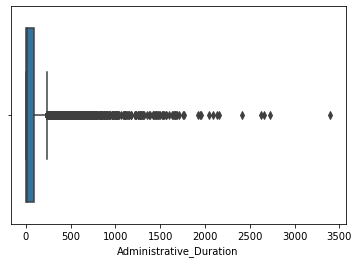

-------------------------------------------------------------


For the Column -  Informational 


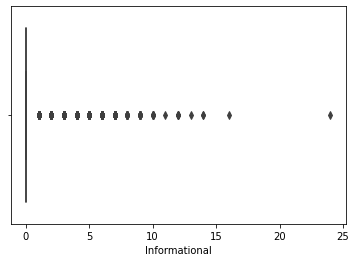

-------------------------------------------------------------


For the Column -  Informational_Duration 


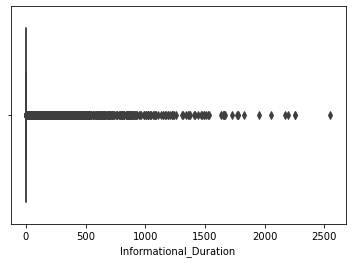

-------------------------------------------------------------


For the Column -  ProductRelated 


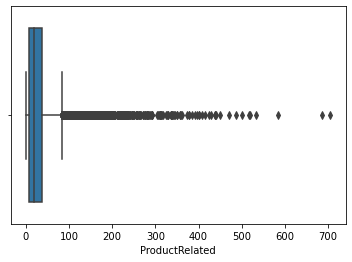

-------------------------------------------------------------


For the Column -  ProductRelated_Duration 


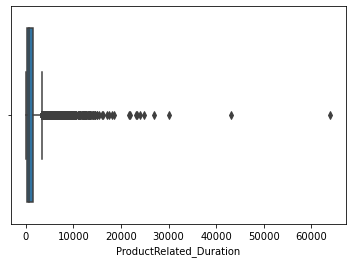

-------------------------------------------------------------


For the Column -  BounceRates 


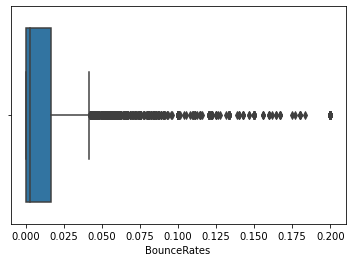

-------------------------------------------------------------


For the Column -  ExitRates 


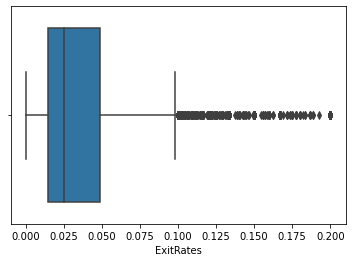

-------------------------------------------------------------


For the Column -  PageValues 


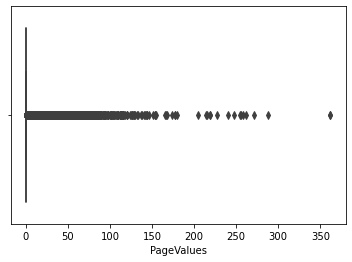

-------------------------------------------------------------




In [39]:
for col in num_col:
    
    print("\033[1mFor the Column - ", col,"\033[0m")
    #boxplot
    sns.boxplot(df_os_nondup[col])
    plt.show()

    print("\033[1m-------------------------------------------------------------\033[0m")
    print("\n")   

In [40]:
#Columns having higher percentage of outliers
#setting the threshold of 20% - in bold

In [41]:
for col in num_col:
    
    print("For the Column - \033[1m", col,"\033[0m")
   
    Q1, Q2, Q3 = np.quantile(df_os_nondup[col], 0.25), np.quantile(df_os_nondup[col], 0.50), np.quantile(df_os_nondup[col], 0.75)
    IQR = Q3 - Q1
    
    UL, LL = Q3 + 1.5* IQR, Q1 - 1.5*IQR
    
    n_outlier = df_os_nondup[ (df_os_1[col] < LL) | (df_os_nondup[col] > UL) ].count()[0] #we do this for first column
    perc_outlier = round(n_outlier*100/len(df_os_nondup),3) 
    
    if (perc_outlier >20):
        print("\033[1mNumber of outliers: ", n_outlier,"\033[0m")
        print("\033[1mPercentage of outliers: ", round(n_outlier*100/len(df_os_nondup),3),"\033[0m")
        
    else:    
        print("Number of outliers: ", n_outlier)
        print("Percentage of outliers: ", round(n_outlier*100/len(df_os_nondup),3))
        
    print("------------------------------------------------------------------")
    print("\n")

For the Column -  Administrative 
Number of outliers:  404
Percentage of outliers:  3.31
------------------------------------------------------------------


For the Column -  Administrative_Duration 
Number of outliers:  1149
Percentage of outliers:  9.414
------------------------------------------------------------------


For the Column -  Informational 
Number of outliers:  2631 
Percentage of outliers:  21.557 
------------------------------------------------------------------


For the Column -  Informational_Duration 
Number of outliers:  2405
Percentage of outliers:  19.705
------------------------------------------------------------------


For the Column -  ProductRelated 
Number of outliers:  1007
Percentage of outliers:  8.251
------------------------------------------------------------------


For the Column -  ProductRelated_Duration 
Number of outliers:  951
Percentage of outliers:  7.792
------------------------------------------------------------------


For the Column

**Inference:**

* The column - 'Informational' and 'PageValues' have higher outlier percentage, other columns have outliers less than 20%
* IQR method (with 3SD) can be used to remove the outliers from the dataset


### Outlier Treatement

In [42]:
df_os_nondup.shape

(12205, 18)

In [43]:
df_os_2 = df_os_nondup.copy()

In [44]:
df_os_2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [45]:
df_os_2.shape

(12205, 18)

In [46]:
num_col

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

In [47]:
for col in num_col:
       
    Q1, Q2, Q3 = np.quantile(df_os_2[col], 0.25), np.quantile(df_os_2[col], 0.50), np.quantile(df_os_2[col], 0.75)
    IQR = Q3 - Q1
    
    UL, LL = Q3 + 1.5* IQR, Q1 - 1.5*IQR
    
    df_os_2 = df_os_2[~ ((df_os_2[col] < LL) | (df_os_2[col] > UL)) ]#we do this for first column

In [48]:
df_os_2.shape

(5588, 18)

In [49]:
#The total records reduced to half if the outliers are removed

In [50]:
#So the outliers can be imputed with Upper and Lower limit values

In [51]:
df_os_3 = df_os_nondup.copy()

In [52]:
num_col3 = df_os_3.select_dtypes(include = [np.number]).columns
num_col3

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

### Outlier Treatement - Imputation

In [53]:
for col in num_col3:
       
    Q1, Q2, Q3 = np.quantile(df_os_3[col], 0.25), np.quantile(df_os_3[col], 0.50), np.quantile(df_os_3[col], 0.75)
    IQR = Q3 - Q1
    
    UL, LL = Q3 + 1.5* IQR, Q1 - 1.5*IQR
    
    df_os_3[col] = np.where(df_os_3[col] < LL, LL, df_os_3[col])
    df_os_3[col] = np.where(df_os_3[col] > UL, UL, df_os_3[col])

In [54]:
df_os_3.shape

(12205, 18)

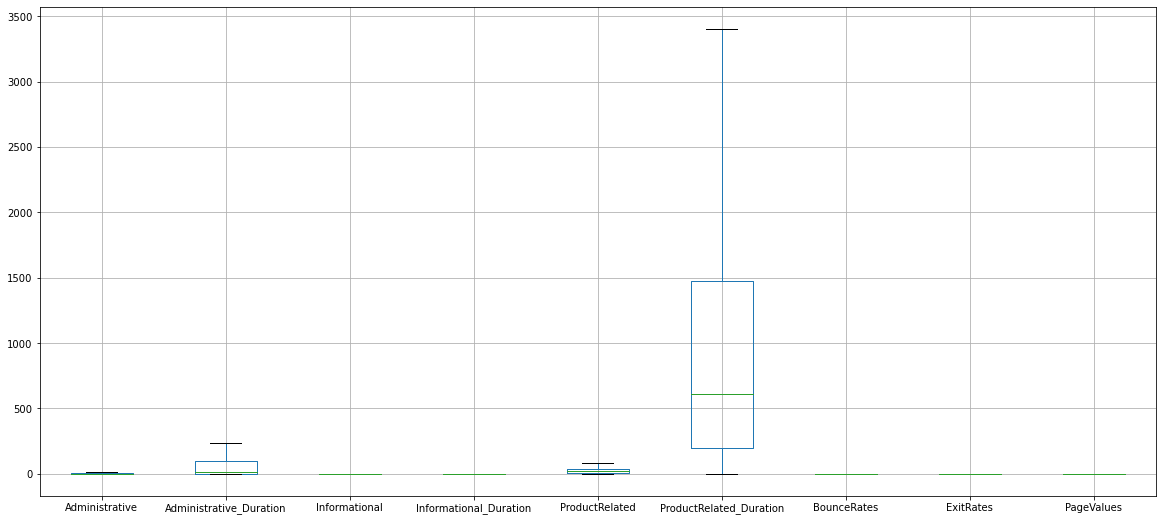

In [55]:
plt.figure(figsize = (20,9))
df_os_3.boxplot()
plt.show()

<a id = 'graph'></a>
## 5. Graphical Representation

<a id = 'univariate_cat'></a>
### 5.1 Univariate Analysis_Categorical Column

In [56]:
df_os_3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [57]:
cat_col = df_os_3.select_dtypes(include = [np.object]).columns
cat_col

Index(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

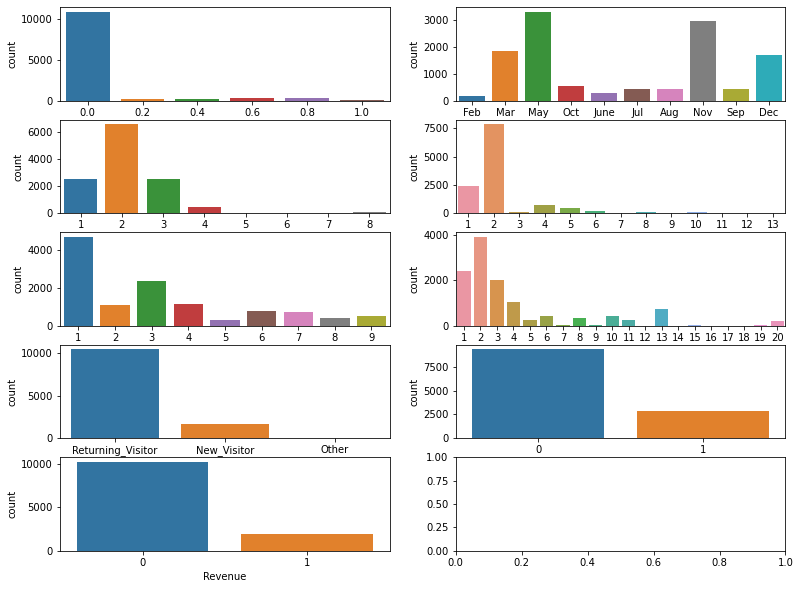

In [58]:
fig,ax = plt.subplots(5,2,figsize=(13,10))

for col,b in zip(df_os_3.select_dtypes([np.object]).columns,ax.flatten()):   
    sns.countplot(df_os_3[col],ax=b)
plt.show()

Count plot for the column -  SpecialDay 


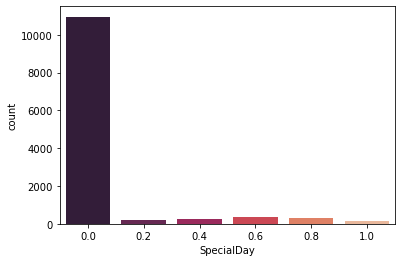

Percentage for each category -  SpecialDay 
SpecialDay
0.0    89.77
0.6     2.87
0.8     2.65
0.4     1.99
0.2     1.46
1.0     1.26
dtype: float64
-----------------------------------------------

Count plot for the column -  Month 


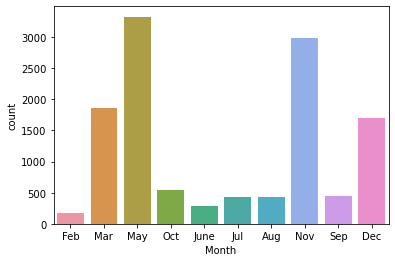

Percentage for each category -  Month 
Month
May     27.28
Nov     24.43
Mar     15.24
Dec     13.98
Oct      4.50
Sep      3.67
Aug      3.55
Jul      3.54
June     2.34
Feb      1.48
dtype: float64
-----------------------------------------------

Count plot for the column -  OperatingSystems 


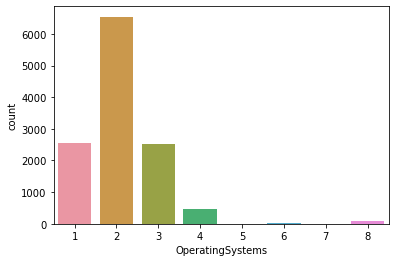

Percentage for each category -  OperatingSystems 
OperatingSystems
2    53.59
1    20.88
3    20.73
4     3.92
8     0.61
6     0.16
7     0.06
5     0.05
dtype: float64
-----------------------------------------------

Count plot for the column -  Browser 


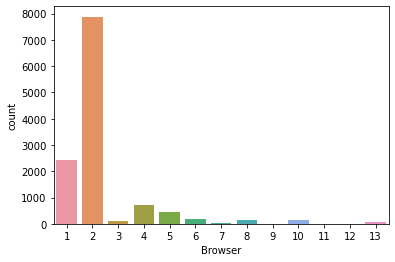

Percentage for each category -  Browser 
Browser
2     64.59
1     19.89
4      5.99
5      3.81
6      1.43
10     1.34
8      1.11
3      0.86
13     0.46
7      0.40
12     0.08
11     0.05
9      0.01
dtype: float64
-----------------------------------------------

Count plot for the column -  Region 


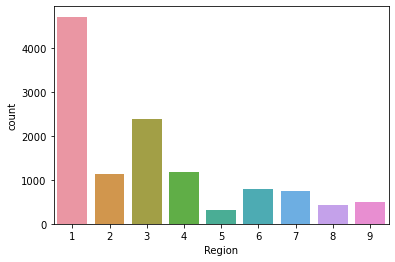

Percentage for each category -  Region 
Region
1    38.62
3    19.49
4     9.59
2     9.24
6     6.56
7     6.21
9     4.14
8     3.53
5     2.61
dtype: float64
-----------------------------------------------

Count plot for the column -  TrafficType 


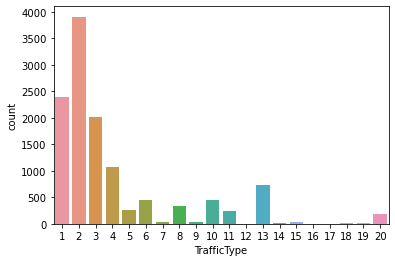

Percentage for each category -  TrafficType 
TrafficType
2     32.04
1     19.57
3     16.49
4      8.73
13     5.96
10     3.69
6      3.63
8      2.81
5      2.13
11     2.02
20     1.58
9      0.34
7      0.33
15     0.30
19     0.14
14     0.11
18     0.08
16     0.02
12     0.01
17     0.01
dtype: float64
-----------------------------------------------

Count plot for the column -  VisitorType 


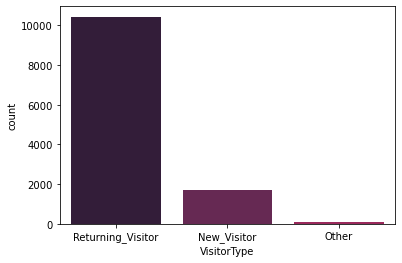

Percentage for each category -  VisitorType 
VisitorType
Returning_Visitor    85.46
New_Visitor          13.87
Other                 0.66
dtype: float64
-----------------------------------------------

Count plot for the column -  Weekend 


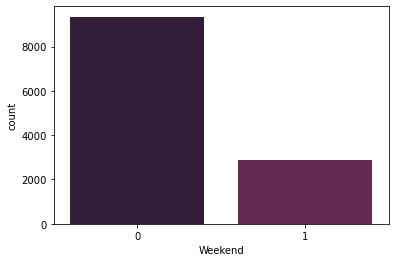

Percentage for each category -  Weekend 
Weekend
0    76.58
1    23.42
dtype: float64
-----------------------------------------------

Count plot for the column -  Revenue 


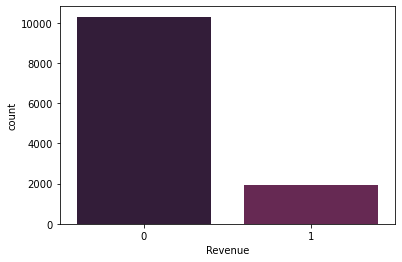

Percentage for each category -  Revenue 
Revenue
0    84.37
1    15.63
dtype: float64
-----------------------------------------------



In [59]:
sns.set_palette('rocket')
for col in cat_col:
    print("\033[1mCount plot for the column - ", col, "\033[0m")
    sns.countplot(df_os_3[col])    
    plt.show()
    
    print("\033[1mPercentage for each category - ", col, "\033[0m")
    print(round(df_os_3.value_counts(df_os_3[col])*100/len(df_os_3),2))
    print("\033[1m-----------------------------------------------\033[0m")
    print()
    

<a id = 'insights_cat'></a>
### 5.1.1 Insights
    
* On SpecialDay (category 0), the visitors browsing for online shopping is high

* During May, Nov, Mar and Dec the number of users are high when compared to other months

* Nearly 85% of existing users visit the online shopping than the new visitors and others

* During the weekdays, 76% of the visitors browse the online shopping than in weekend

* Overall 84% of visitors do not genenrate revenue in the online shopping

In [60]:
df_os_3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [61]:
df_os_3.reset_index(inplace = True)

In [62]:
df_os_3.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,2,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,3,0.0,0.0,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


<a id = 'univariate_num'></a>
### 5.2 Univariate Analysis_Numerical Column

In [63]:
num_col_fin = df_os_3.select_dtypes(include = [np.number]).columns
num_col_fin

Index(['index', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

Box Plot plot for the column -  index 


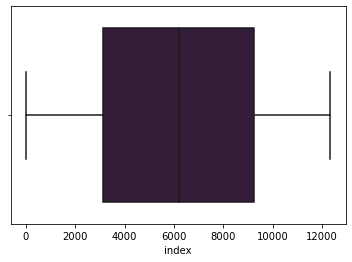

Box Plot plot for the column -  Administrative 


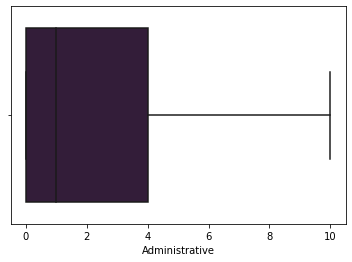

Box Plot plot for the column -  Administrative_Duration 


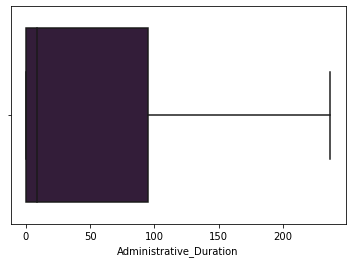

Box Plot plot for the column -  Informational 


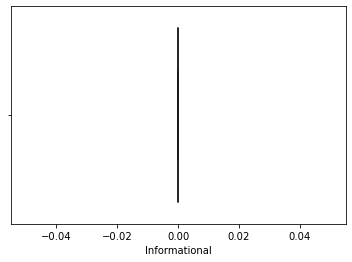

Box Plot plot for the column -  Informational_Duration 


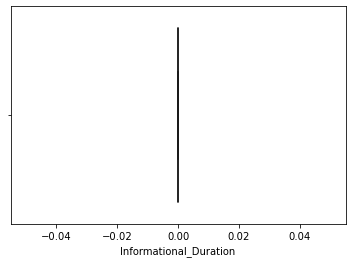

Box Plot plot for the column -  ProductRelated 


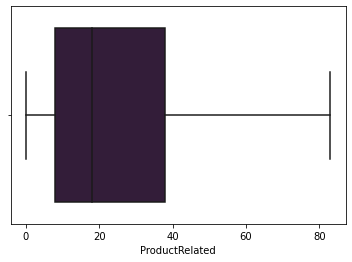

Box Plot plot for the column -  ProductRelated_Duration 


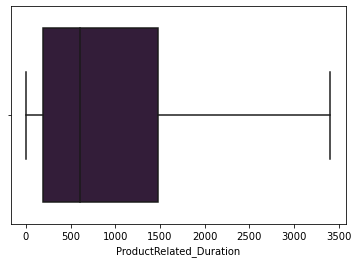

Box Plot plot for the column -  BounceRates 


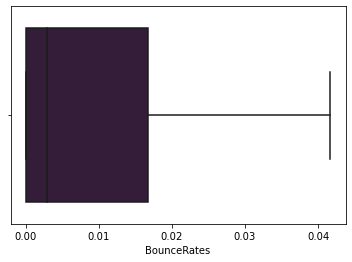

Box Plot plot for the column -  ExitRates 


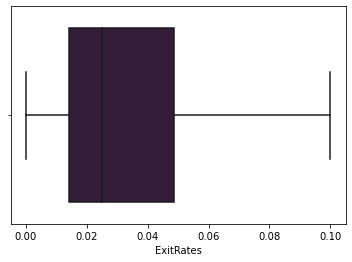

Box Plot plot for the column -  PageValues 


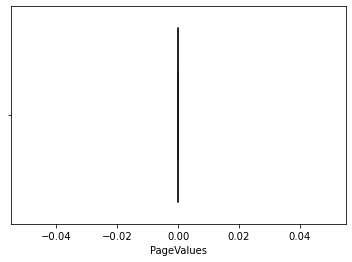

In [64]:
sns.set_palette('rocket')
for col in num_col_fin:
    print("\033[1mBox Plot plot for the column - ", col, "\033[0m")
    sns.boxplot(df_os_3[col])    
    plt.show()

**For Informational, Information_Duration column and PageValue**

In [65]:
#Before outlier treatement
df_os_nondup['Informational'].value_counts()

0     9574
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
24       1
16       1
11       1
13       1
Name: Informational, dtype: int64

In [66]:
#After outlier Treatement
df_os_3['Informational'].value_counts()

0.0    12205
Name: Informational, dtype: int64

In [67]:
#Before outlier treatement
df_os_nondup['Informational_Duration'].value_counts()

0.000000      9800
9.000000        33
6.000000        26
10.000000       26
7.000000        26
              ... 
264.750000       1
162.750000       1
78.500000        1
173.233333       1
277.500000       1
Name: Informational_Duration, Length: 1258, dtype: int64

In [68]:
#After outlier Treatement
df_os_3['Informational_Duration'].value_counts()

0.0    12205
Name: Informational_Duration, dtype: int64

In [69]:
#Before outlier Treatement
df_os_nondup['PageValues'].value_counts()

0.000000     9475
53.988000       6
42.293068       3
16.158558       2
12.558857       2
             ... 
48.453707       1
8.052496        1
19.714689       1
1.104440        1
15.756363       1
Name: PageValues, Length: 2704, dtype: int64

In [70]:
#After outlier Treatement
df_os_3['PageValues'].value_counts()

0.0    12205
Name: PageValues, dtype: int64

* The Informational page and duration spent by the browsing visitors is almost 0 

<a id = 'insights_num'></a>
### 5.2.1 Insights

* Visitor's browsing duration for Administrative page ranges from 0 to 200
* Bounce Rate ranges from 0 to 0.04, mostly it varies around 0 to 0.02. Exit rate ranges from 0 to 0.1, which lies mostly around 0.02 and 0.04

<a id = 'bivariate_num'></a>
### 5.3 Bivariate Analysis - Numerical and Target(Revenue)

In [71]:
num_col_fin = df_os_3.select_dtypes(include = [np.number]).columns
num_col_fin

Index(['index', 'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

For the Column - Administrative and Target


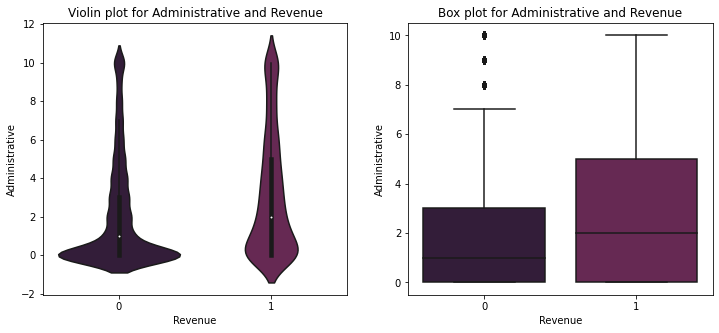

In [72]:
print("\033[1mFor the Column - Administrative and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for Administrative and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['Administrative'])

plt.subplot(1,2,2)
plt.title('Box plot for Administrative and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['Administrative']) 
plt.show()

For the Column - Administrative_Duration and Target


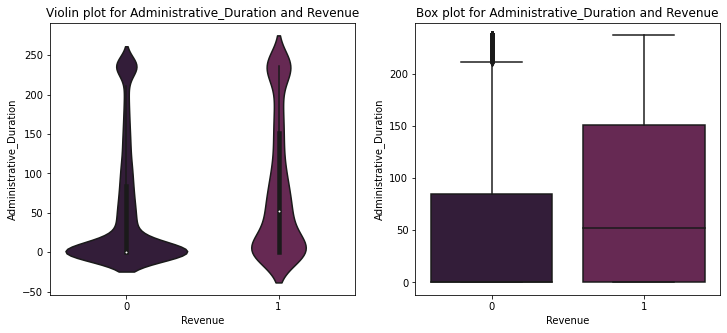

In [73]:
print("\033[1mFor the Column - Administrative_Duration and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for Administrative_Duration and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['Administrative_Duration'])

plt.subplot(1,2,2)
plt.title('Box plot for Administrative_Duration and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['Administrative_Duration']) 
plt.show()

For the Column - Informational and Target


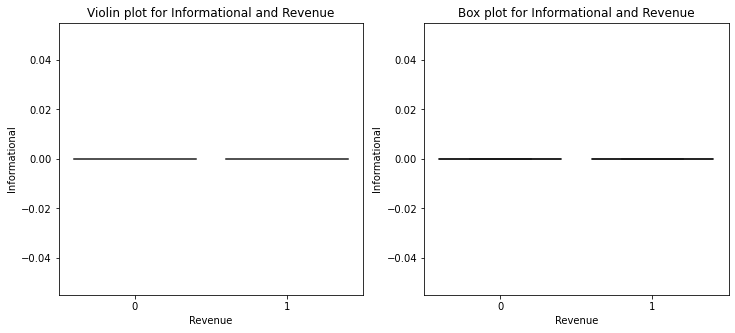

In [74]:
print("\033[1mFor the Column - Informational and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for Informational and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['Informational'])

plt.subplot(1,2,2)
plt.title('Box plot for Informational and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['Informational']) 
plt.show()

For the Column - Informational_Duration and Target


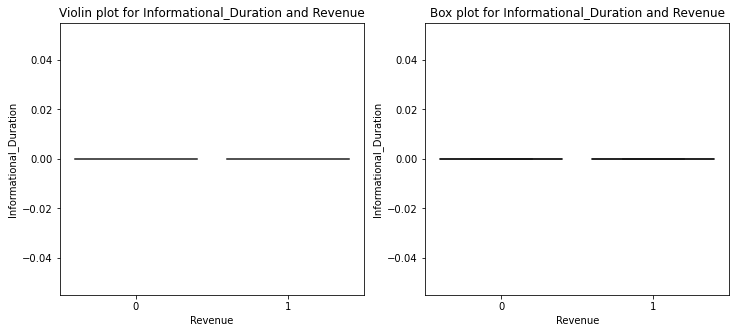

In [75]:
print("\033[1mFor the Column - Informational_Duration and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for Informational_Duration and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['Informational_Duration'])

plt.subplot(1,2,2)
plt.title('Box plot for Informational_Duration and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['Informational_Duration']) 
plt.show()

For the Column - ProductRelated and Target


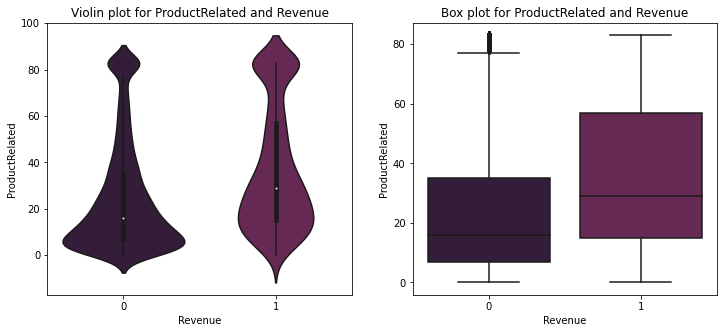

In [76]:
print("\033[1mFor the Column - ProductRelated and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for ProductRelated and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['ProductRelated'])

plt.subplot(1,2,2)
plt.title('Box plot for ProductRelated and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['ProductRelated']) 
plt.show()

For the Column - ProductRelated_Duration and Target


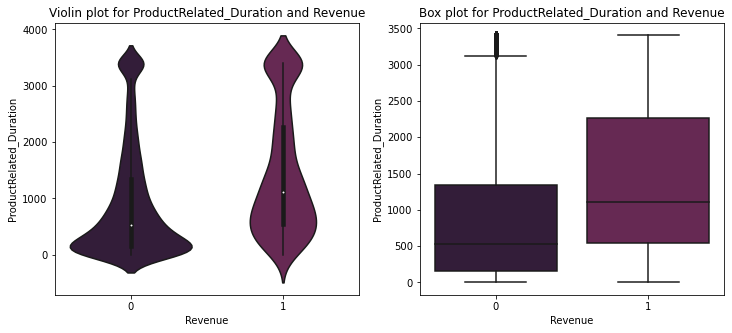

In [77]:
print("\033[1mFor the Column - ProductRelated_Duration and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for ProductRelated_Duration and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['ProductRelated_Duration'])

plt.subplot(1,2,2)
plt.title('Box plot for ProductRelated_Duration and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['ProductRelated_Duration']) 
plt.show()

For the Column - ExitRates and Target


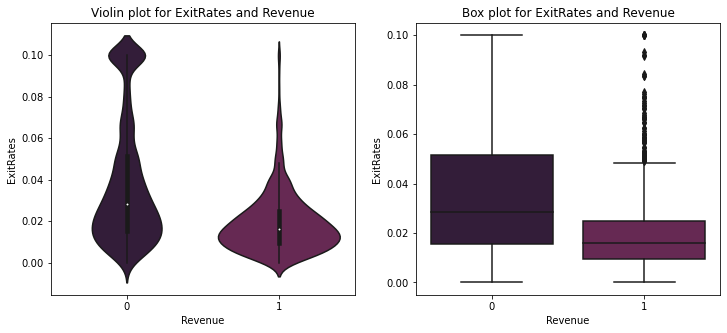

In [78]:
print("\033[1mFor the Column - ExitRates and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for ExitRates and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['ExitRates'])

plt.subplot(1,2,2)
plt.title('Box plot for ExitRates and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['ExitRates']) 
plt.show()

For the Column - BounceRates and Target


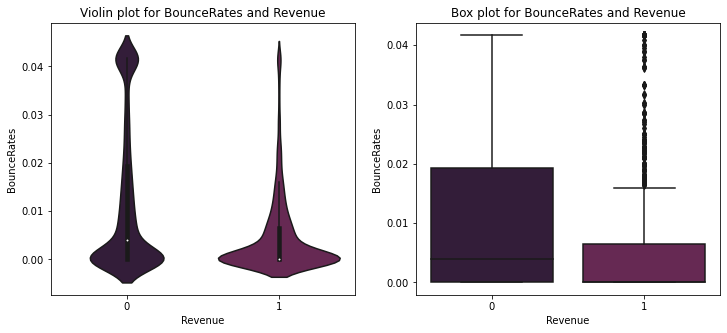

In [79]:
print("\033[1mFor the Column - BounceRates and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for BounceRates and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['BounceRates'])

plt.subplot(1,2,2)
plt.title('Box plot for BounceRates and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['BounceRates']) 
plt.show()

For the Column - PageValues and Target


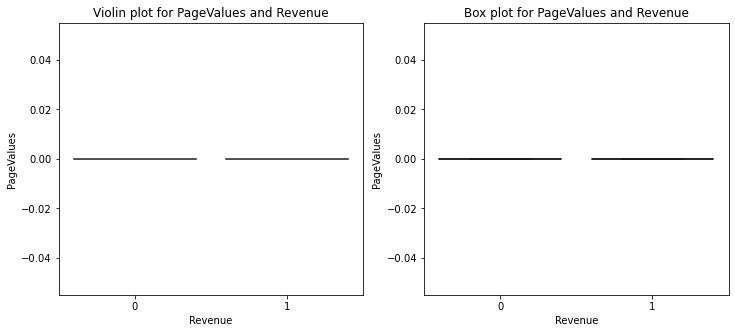

In [80]:
print("\033[1mFor the Column - PageValues and Target\033[0m")

plt.figure(figsize = (12,5))


plt.subplot(1,2,1) # row 1, col 2 index 1
plt.title('Violin plot for PageValues and Revenue')
sns.violinplot(df_os_3['Revenue'], df_os_3['PageValues'])

plt.subplot(1,2,2)
plt.title('Box plot for PageValues and Revenue')
sns.boxplot(df_os_3['Revenue'], df_os_3['PageValues']) 
plt.show()

<a id = 'insights_bi_num'></a>
### 5.3.1 Insights

* For those Visitors who generate Revenue in Online Shopping;
> * The Duration on Administrative, ProductReated page is high in range
> * The BounceRates and ExitRates are minimum

* Informational and its duration, PageValues doesn't interpret on the Target (Revenue column)

<a id = 'bivariate_cat'></a>
### 5.4 Bivariate Analysis - Categorical and Target(Revenue)

In [81]:
cat_col

Index(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

Bivariate Analysis SpecialDay Vs Target and Month Vs Target


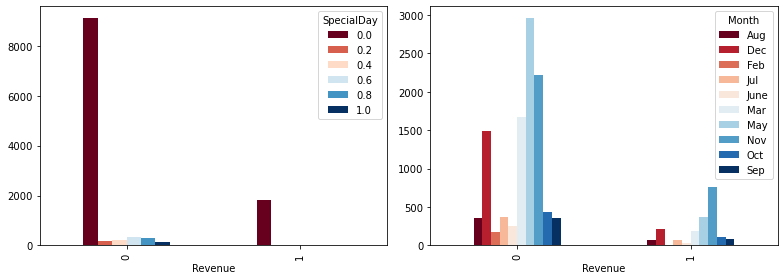

In [82]:
print("\033[1mBivariate Analysis SpecialDay Vs Target and Month Vs Target\033[0m")

fig, axes = plt.subplots(1,2)

pd.crosstab(df_os_3['Revenue'], df_os_3['SpecialDay']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [0])

pd.crosstab(df_os_3['Revenue'], df_os_3['Month']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [1])

fig.set_size_inches(11,4)
plt.tight_layout()
plt.show()

Bivariate Analysis OperatingSystems Vs Target and Browser Vs Target


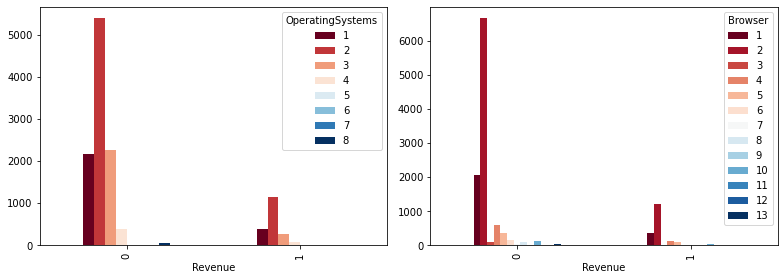

In [83]:
print("\033[1mBivariate Analysis OperatingSystems Vs Target and Browser Vs Target\033[0m")

fig, axes = plt.subplots(1,2)

pd.crosstab(df_os_3['Revenue'], df_os_3['OperatingSystems']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [0])

pd.crosstab(df_os_3['Revenue'], df_os_3['Browser']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [1])

fig.set_size_inches(11,4)
plt.tight_layout()
plt.show()

Bivariate Analysis VisitorType Vs Target and TrafficType Vs Target


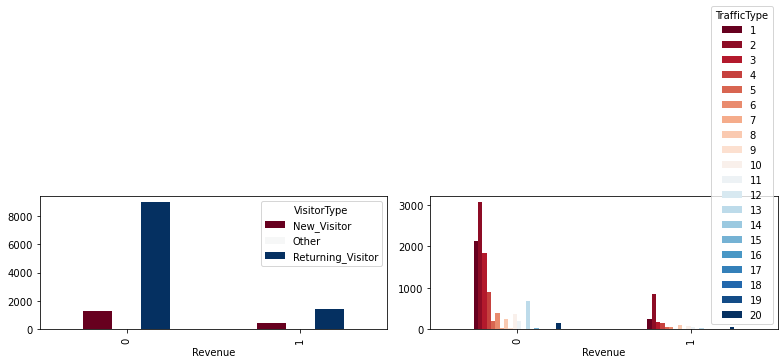

In [84]:
print("\033[1mBivariate Analysis VisitorType Vs Target and TrafficType Vs Target\033[0m")

fig, axes = plt.subplots(1,2)

pd.crosstab(df_os_3['Revenue'], df_os_3['VisitorType']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [0])

pd.crosstab(df_os_3['Revenue'], df_os_3['TrafficType']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [1])

fig.set_size_inches(11,4)
plt.tight_layout()
plt.show()

Bivariate Analysis VisitorType Vs Target and TrafficType Vs Target


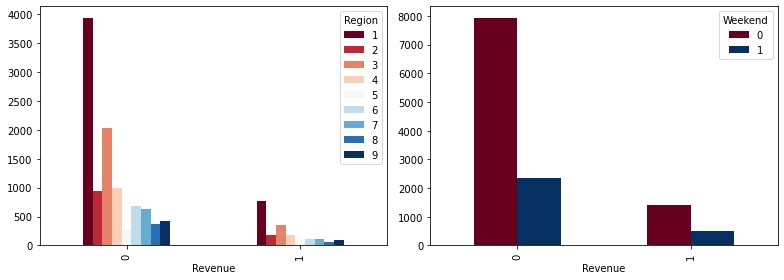

In [85]:
print("\033[1mBivariate Analysis VisitorType Vs Target and TrafficType Vs Target\033[0m")

fig, axes = plt.subplots(1,2)

pd.crosstab(df_os_3['Revenue'], df_os_3['Region']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [0])

pd.crosstab(df_os_3['Revenue'], df_os_3['Weekend']).plot(kind = 'bar', colormap = 'RdBu', ax = axes [1])

fig.set_size_inches(11,4)
plt.tight_layout()
plt.show()

<a id = 'insights_bi_cat'></a>
### 5.4.1 Insights

* Visitors are more in number for the SpecialDay 0.
* Visitors browse the online shopping more in the months - March, October and December
* Same users (Returning Visitors) are more in number in browsing the Online Shopping

<a id = 'heat_map'></a>
### 5.5 Correlation Plot

In [86]:
df_os_target_num = df_os_3.copy()

In [87]:
#Changing the target column to numerical column for the correlation plot
df_os_target_num['Revenue'] = df_os_target_num['Revenue'].astype('int64')

In [88]:
df_os_target_num.shape

(12205, 19)

In [89]:
mask = np.zeros_like(df_os_target_num.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

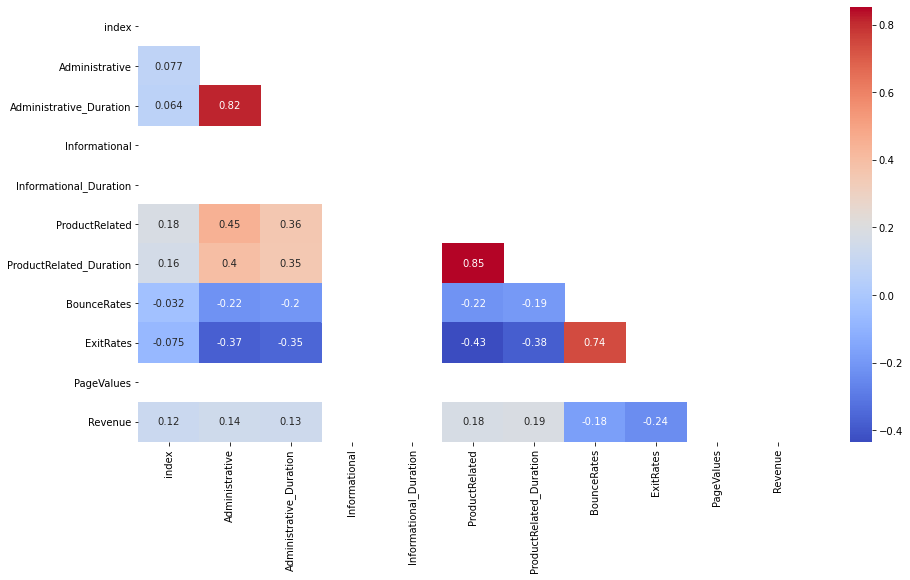

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(df_os_target_num.corr(), mask = mask, annot=True, cmap = 'coolwarm')
plt.show()

<a id = 'insights_corr_plot'></a>
### 5.5.1 Insights

* 'BounceRates', 'ExitRates' shows small correlation with 'Revenue'
* 'Informational' and 'InformationalDuration' features are has 0 correlation between the features 

<a id = 'elim_col'></a>
## 6. Eliminating Feature(s) based on the EDA performed

* Dropping columns - 'Informational', 'Informational_Duration' and 'PageValues' feature from the dataset, as it has 0 correlation and doesnot interpret/contribute to the target column - Revenue

In [123]:
df_os_4 = df_os_3.copy()

In [124]:
df_os_4.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,2,0.0,0.0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,3,0.0,0.0,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [94]:
#break

In [125]:
df_os_4.index

RangeIndex(start=0, stop=12205, step=1)

In [126]:
df_os_4.shape

(12205, 19)

In [127]:
df_os_4.drop(['Informational', 'Informational_Duration', 'PageValues', 'index'], axis = 1, inplace = True)

In [128]:
df_os_4.shape

(12205, 15)

<a id = 'scale'></a>
## 7. Scaling - StandardScaler

In [129]:
df_os_num = df_os_4.select_dtypes(include = [np.number])
df_os_num.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
0,0.0,0.0,1.0,0.000000,0.041667,0.099977
1,0.0,0.0,2.0,64.000000,0.000000,0.099977
2,0.0,0.0,1.0,0.000000,0.041667,0.099977
3,0.0,0.0,2.0,2.666667,0.041667,0.099977
4,0.0,0.0,10.0,627.500000,0.020000,0.050000


In [130]:
df_os_num.shape

(12205, 6)

In [131]:
num_col_f1 = df_os_num.select_dtypes(include = [np.number]).columns
num_col_f1

Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates'],
      dtype='object')

In [132]:
df_os_num_std = df_os_num.copy()

In [133]:
df_os_num_std = StandardScaler().fit_transform(df_os_num)
df_os_num_std

array([[-0.75788313, -0.72191053, -1.03887586, -0.9656584 ,  2.14175149,
         2.20515864],
       [-0.75788313, -0.72191053, -0.99866529, -0.90393852, -0.72777739,
         2.20515864],
       [-0.75788313, -0.72191053, -1.03887586, -0.9656584 ,  2.14175149,
         2.20515864],
       ...,
       [-0.75788313, -0.72191053, -0.83782299, -0.78797263,  2.14175149,
         1.75011411],
       [ 0.60687119,  0.21321548, -0.47592782, -0.63198526, -0.72777739,
        -0.49304159],
       [-0.75788313, -0.72191053, -0.95845471, -0.94516547, -0.72777739,
         1.06637146]])

<a id='pca'></a>
## 8. Principal Component Analysis (PCA)

It is an unsupervised dimension reduction technique used to transform the higher dimensional dataset to a lower dimension.

<a id='cov_mat'></a>
### 8.1 Covariance Matrix

In [134]:
cov_mat = np.cov(df_os_num_std.T)
print(cov_mat[::])

[[ 1.00008194  0.81645387  0.44714514  0.3963855  -0.22212335 -0.37454943]
 [ 0.81645387  1.00008194  0.3601691   0.3532095  -0.20403317 -0.35481715]
 [ 0.44714514  0.3601691   1.00008194  0.85280654 -0.21525566 -0.43349142]
 [ 0.3963855   0.3532095   0.85280654  1.00008194 -0.19484821 -0.38139431]
 [-0.22212335 -0.20403317 -0.21525566 -0.19484821  1.00008194  0.73762402]
 [-0.37454943 -0.35481715 -0.43349142 -0.38139431  0.73762402  1.00008194]]


<a id='eigen'></a>
### 8.2 Compute Eigenvalues and Eigenvectors 

In [135]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [3.14181776 1.24415463 1.059767   0.13191188 0.19136814 0.23147223] 

Eigenvectors: 
 
 [[ 0.43179375  0.2726364  -0.46280582  0.31279579 -0.65023311  0.06625716]
 [ 0.4078627   0.2658796  -0.53499451 -0.29288655  0.62476367  0.02499513]
 [ 0.44366005  0.2218269   0.48259951 -0.66361946 -0.27996911 -0.04777868]
 [ 0.42605009  0.2448665   0.51331675  0.58798812  0.324469    0.20980341]
 [-0.31010618  0.69357111  0.056166    0.09971422  0.02770894 -0.63947474]
 [-0.41555193  0.51455784 -0.00637615 -0.14252198 -0.04936225  0.73468157]] 



**Interpretation:** 
    
* For the 6X6 (6 numerical feature) covariance matrix, we get 6 eigenvalues and eigenvectors. The eigenvector corresponding to the largest eigenvalue represent the direction of the highest variation in the dataset.

<a id='components'></a>
### 8.3 Decide Number of Principal Components

#### 1) Kaiser criterion: This criterion considers the number of pricipal components for which the eigenvalue is greater than 1. This criterion suffers a drawback of selecting more number of components as the eigenvalues very close to 1 may not contribute significantly in explaining the variation in the data.


In [136]:
eig_val_sort = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val_sort.sort(reverse = True)

# print the sorted list
print(eig_val_sort)

[3.1418177621613053, 1.244154629457846, 1.0597669971178638, 0.23147223108958653, 0.191368141397069, 0.13191188086089078]


#### 2) Scree plot: Plot the eigenvalues and choose the number of components corresponding to the elbow point.

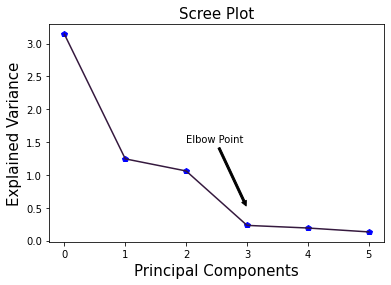

In [138]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val_sort,'bp')            

# plot a line plot
plt.plot(eig_val_sort) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Elbow Point', xy=(3,0.5), xytext=(2, 1.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# display the plot
plt.show()   

#### 3) Percentage of Explained Variation: Calculate the percentage of variation explained by each principal component. We consider the number of components that explain most of the variation.

In [139]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val_sort:
    variation = (i/sum(eig_val_sort))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[52.359339026924175,
 20.73421152246833,
 17.661336109280914,
 3.857554428809661,
 3.1892076984976523,
 2.19835121401927]

In [140]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 52.35933903,  73.09355055,  90.75488666,  94.61244109,
        97.80164879, 100.        ])

**Inference:**

* By considering the 4 components as per the scree plot, the components explain approximately 95% of the variation.

* For this dataset, let us choose the `four` principal components that explain 95% of the variation.

In [141]:
print("Eigen Values: ", eig_val)
print("\n")
print("Sorted Eigen Values: ", eig_val_sort)

Eigen Values:  [3.14181776 1.24415463 1.059767   0.13191188 0.19136814 0.23147223]


Sorted Eigen Values:  [3.1418177621613053, 1.244154629457846, 1.0597669971178638, 0.23147223108958653, 0.191368141397069, 0.13191188086089078]


In [142]:
#### Index of the first four largest eigen values

import numpy as np
s = np.array(eig_val)
sort_index = np.argsort(s)[::-1]
print(sort_index[:4])

[0 1 2 5]


<a id='comp'></a>
### 8.4 Principal Components 

In [143]:
# consider the eigenvectors corresponding to the first five highest eigenvalues
# these eigenvectors are the 0th, 1st, 2nd and 5th columns of 'eig_vec' 
eigenvector = eig_vec[:,[0,1,2,5]]

# print the vectors
eigenvector

array([[ 0.43179375,  0.2726364 , -0.46280582,  0.06625716],
       [ 0.4078627 ,  0.2658796 , -0.53499451,  0.02499513],
       [ 0.44366005,  0.2218269 ,  0.48259951, -0.04777868],
       [ 0.42605009,  0.2448665 ,  0.51331675,  0.20980341],
       [-0.31010618,  0.69357111,  0.056166  , -0.63947474],
       [-0.41555193,  0.51455784, -0.00637615,  0.73468157]])

In [ ]:
#Generating new Dataset of reduced dimensions

In [144]:
df_pca = pd.DataFrame(df_os_num_std.dot(eigenvector), columns= ['PC1','PC2', 'PC3', 'PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,-3.074544,1.754663,-0.153846,0.029272
1,-2.140550,-0.211527,-0.263928,1.875291
2,-3.074544,1.754663,-0.153846,0.029272
3,-3.055609,1.764212,-0.133120,0.027890
4,-1.483437,0.069045,0.258521,-0.162119


In [145]:
df_pca.shape

(12205, 4)

In [151]:
df_pca.index

RangeIndex(start=0, stop=12205, step=1)

* Six numerical columns reduced to 4

In [146]:
df_os_4.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,2.0,64.000000,0.000000,0.099977,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,1.0,0.000000,0.041667,0.099977,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.0,2.666667,0.041667,0.099977,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [147]:
cat_col

Index(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [148]:
df_os_4[cat_col]

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...
12200,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12201,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12202,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12203,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


<a id ='ds_dim'></a>
## 9. Dataset after Dimensionality Reduction

In [149]:
df_os_4_cat = df_os_4[cat_col]
df_os_4_cat.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [152]:
df_os_4_cat.shape

(12205, 9)

In [ ]:
#pd.merge(df_os_4_cat, df_pca, left_index=True, right_index=True)

In [153]:
#concatenating the categorical feature and numerical column (with principle components)
df_os_dim_red = pd.concat([df_os_4_cat, df_pca], axis = 1)
df_os_dim_red

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PC1,PC2,PC3,PC4
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,-2.140550,-0.211527,-0.263928,1.875291
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,-3.055609,1.764212,-0.133120,0.027890
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,-1.483437,0.069045,0.258521,-0.162119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.0,Dec,4,6,1,1,Returning_Visitor,1,0,1.510598,0.502390,0.179264,0.141772
12201,0.0,Nov,3,2,1,8,Returning_Visitor,1,0,-0.804709,-1.473339,0.010310,-0.024455
12202,0.0,Nov,3,2,1,13,Returning_Visitor,1,0,-2.720548,1.608624,0.037293,-0.277368
12203,0.0,Nov,2,2,3,11,Returning_Visitor,0,0,0.299171,-0.796645,-0.986756,0.038852


In [154]:
df_os_dim_red.shape

(12205, 13)

<a id='hierar'></a>
## 10.  Hierarchical Clustering - Agglomerative

### Build the Model

To perform hierarchical clustering, we need to specify the number of required clusters to the `AgglomerativeClustering()` from the scikit-learn library.

To find the optimal number of clusters, we consider two methods: `Dendrogram` and `Silhouette Score Method`.

First, we find the linkage matrix. It represents the distance between the clusters based on the given linkage method. There are several linkage methods like `single`, `complete`, `average`, `centroid` `ward`. Here we use the `ward linkage` to calculate the linkage matrix. For most of the datasets, this method returns most explicit clusters.

In [155]:
df_os_dim_red.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PC1,PC2,PC3,PC4
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,-2.140550,-0.211527,-0.263928,1.875291
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,-3.055609,1.764212,-0.133120,0.027890
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,-1.483437,0.069045,0.258521,-0.162119


In [156]:
features_scaled = np.array(df_os_dim_red[['PC1', 'PC2', 'PC3', 'PC4']])
features_scaled

array([[-3.07454446,  1.75466281, -0.15384554,  0.0292717 ],
       [-2.14055022, -0.2115266 , -0.26392803,  1.87529078],
       [-3.07454446,  1.75466281, -0.15384554,  0.0292717 ],
       ...,
       [-2.72054766,  1.60862431,  0.037293  , -0.27736809],
       [ 0.29917095, -0.79664457, -0.98675642,  0.03885214],
       [-1.66704994, -0.79867378, -0.25842384,  1.02807406]])

In [158]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[    0.     2.     0.     2.]
 [    6. 12205.     0.     3.]
 [ 2682.  2700.     0.     2.]
 [   16. 12206.     0.     4.]
 [    7.  2281.     0.     2.]
 [    8.  3389.     0.     2.]
 [   24. 12208.     0.     5.]
 [   18.  1595.     0.     2.]
 [   21.   187.     0.     2.]
 [   22. 12003.     0.     2.]]


<a id="silhouette"></a>
### 10.1 Silhouette Score Method - Optimal Cluster Number

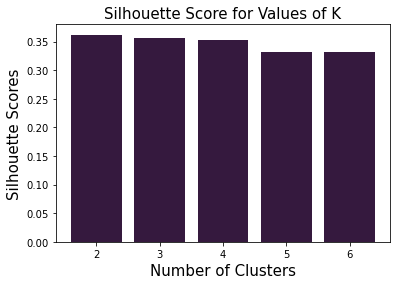

In [160]:
# consider different values of K
K = [2,3,4,5,6]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, model.fit_predict(features_scaled))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** 

* The above plot shows that the Silhouette score for K = 2 is the highest. This implies that K = 2 is the optimal value for number of clusters.

<a id='retrieve_clusters'></a>
### 10.2 Retrieve the Clusters

In [161]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [162]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
len(clusters.labels_)

12205

In [163]:
df_os_dim_red_cluster = df_os_dim_red.copy()

In [164]:
df_os_dim_red_cluster.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PC1,PC2,PC3,PC4
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,-2.140550,-0.211527,-0.263928,1.875291
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,-3.055609,1.764212,-0.133120,0.027890
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,-1.483437,0.069045,0.258521,-0.162119


In [165]:
df_os_dim_red_cluster.shape

(12205, 13)

In [167]:
# add a column containing cluster number to the original data
df_os_dim_red_cluster['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df_os_dim_red_cluster.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PC1,PC2,PC3,PC4,Cluster
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272,0
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,-2.140550,-0.211527,-0.263928,1.875291,0
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272,0
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,-3.055609,1.764212,-0.133120,0.027890,0
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,-1.483437,0.069045,0.258521,-0.162119,0


In [169]:
# check the size of each cluster
df_os_dim_red_cluster['Cluster'].value_counts()

0    8869
1    3336
Name: Cluster, dtype: int64

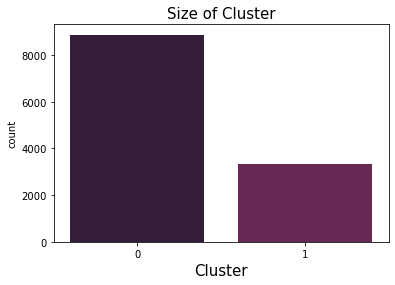

In [171]:
# plot the countplot for the cluster size
sns.countplot(data = df_os_dim_red_cluster, x = 'Cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
# display the plot
plt.show()

<a id='ana_clusters'></a>
## 11. Analyze the Clusters

In [172]:
df_os_dim_red_cluster.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PC1,PC2,PC3,PC4,Cluster
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272,0
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,-2.140550,-0.211527,-0.263928,1.875291,0
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272,0
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,-3.055609,1.764212,-0.133120,0.027890,0
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,-1.483437,0.069045,0.258521,-0.162119,0


In [173]:
df_os_dim_red_cluster.shape

(12205, 14)

In [174]:
### Cluster_0

df_os_dim_red_cluster_0 = df_os_dim_red_cluster[df_os_dim_red_cluster['Cluster'] == 0]


### Cluster_1

df_os_dim_red_cluster_1 = df_os_dim_red_cluster[df_os_dim_red_cluster['Cluster'] == 1]

In [176]:
print("Shape of df_os_dim_red_cluster_0", df_os_dim_red_cluster_0.shape)
print("Shape of df_os_dim_red_cluster_1", df_os_dim_red_cluster_1.shape)

Shape of df_os_dim_red_cluster_0 (8869, 14)
Shape of df_os_dim_red_cluster_1 (3336, 14)


<a id='clus_0'></a>
### 11.1 Analyze Cluster_0

In [180]:
df_os_dim_red_cluster_0.describe(include = np.number)

,PC1,PC2,PC3,PC4,Cluster
count,8869.000000,8869.000000,8869.000000,8869.000000,8869.0
mean,-0.833829,-0.193377,0.064057,-0.030165,0.0
std,1.173217,1.170168,0.727969,0.534516,0.0
min,-3.092384,-1.992393,-3.015849,-1.832216,0.0
25%,-1.577518,-1.113005,-0.239689,-0.340916,0.0
50%,-0.671543,-0.594393,-0.013366,-0.069932,0.0
75%,0.036826,0.640800,0.404565,0.127422,0.0
max,1.817115,3.616315,3.129561,2.149749,0.0


In [181]:
df_os_dim_red_cluster_0.describe(include = np.object)

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,8869.0,8869,8869,8869,8869,8869,8869,8869,8869
unique,6.0,10,8,13,9,20,3,2,2
top,0.0,May,2,2,1,2,Returning_Visitor,0,0
freq,7825.0,2565,4622,5596,3413,2519,7519,6842,7785


In [185]:
df_os_dim_red_cluster_0['Revenue'].value_counts()

0    7785
1    1084
Name: Revenue, dtype: int64

<a id='clus_1'></a>
### 11.2 Analyze Cluster_1

In [182]:
df_os_dim_red_cluster_1.describe(include = np.number)

,PC1,PC2,PC3,PC4,Cluster
count,3336.000000,3336.000000,3336.000000,3336.000000,3336.0
mean,2.216795,0.514107,-0.170300,0.080196,1.0
std,1.035566,0.740232,1.558528,0.280132,0.0
min,-0.286004,-0.939854,-3.372810,-0.967831,1.0
25%,1.434216,-0.073300,-1.412438,-0.117320,1.0
50%,2.007931,0.418142,-0.303097,0.083894,1.0
75%,2.893062,1.025026,0.984358,0.269802,1.0
max,4.730438,4.221666,3.057050,1.136589,1.0


In [183]:
df_os_dim_red_cluster_1.describe(include = np.object)

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,3336.0,3336,3336,3336,3336,3336,3336,3336,3336
unique,6.0,10,7,11,9,18,3,2,2
top,0.0,Nov,2,2,1,2,Returning_Visitor,0,0
freq,3131.0,1061,1919,2287,1301,1392,2912,2504,2512


In [184]:
df_os_dim_red_cluster_1['Revenue'].value_counts()

0    2512
1     824
Name: Revenue, dtype: int64

<a id='best_model'></a>
## 12. Finding the best model for each clusters using PyCaret

In [187]:
import missingno as mso
import seaborn as sns
import warnings
import pycaret

from pycaret.classification import *

warnings.filterwarnings('ignore') 


### For the Cluster --> 0

In [188]:
df_os_dim_red_cluster_0.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PC1,PC2,PC3,PC4,Cluster
0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272,0
1,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,-2.140550,-0.211527,-0.263928,1.875291,0
2,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,-3.074544,1.754663,-0.153846,0.029272,0
3,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,-3.055609,1.764212,-0.133120,0.027890,0
4,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,-1.483437,0.069045,0.258521,-0.162119,0


In [190]:
df_os_dim_red_cluster_0.select_dtypes(include = [np.object]).columns

Index(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [192]:
df_modeling_cluster_0 = df_os_dim_red_cluster_0.sample(frac=0.8, random_state=123)
df_unseen_cluster_0 = df_os_dim_red_cluster_0.drop(df_modeling_cluster_0.index)

df_modeling_cluster_0.reset_index(inplace=True, drop=True)
df_unseen_cluster_0.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(df_modeling_cluster_0.shape))
print('Unseen Data For Predictions: ' + str(df_unseen_cluster_0.shape))

Data for Modeling: (7095, 14)
Unseen Data For Predictions: (1774, 14)


In [194]:
stp = setup(data = df_modeling_cluster_0, 
            target = 'Revenue',
            train_size = 0.8,
            categorical_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
                                    'TrafficType', 'VisitorType', 'Weekend'], 
            fix_imbalance = True,
            silent = True,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,Revenue
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7095, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [195]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8790,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0390
rf,Random Forest Classifier,0.8606,0.7612,0.1806,0.3481,0.2363,0.1689,0.1803,0.3120
et,Extra Trees Classifier,0.8566,0.7383,0.1442,0.3158,0.1954,0.1283,0.1416,0.4150
xgboost,Extreme Gradient Boosting,0.8557,0.7649,0.2213,0.3476,0.2693,0.1940,0.2005,1.1260
lightgbm,Light Gradient Boosting Machine,0.8520,0.7709,0.2009,0.3240,0.2471,0.1702,0.1766,1.0030
gbc,Gradient Boosting Classifier,0.8166,0.7676,0.3990,0.3058,0.3454,0.2413,0.2445,0.7530
dt,Decision Tree Classifier,0.7919,0.5780,0.2957,0.2270,0.2560,0.1379,0.1398,0.0590
ada,Ada Boost Classifier,0.7579,0.7450,0.5256,0.2558,0.3436,0.2163,0.2379,0.2140
lr,Logistic Regression,0.6797,0.7599,0.7091,0.2309,0.3482,0.2028,0.2597,0.9480
knn,K Neighbors Classifier,0.6772,0.6832,0.5957,0.2094,0.3098,0.1589,0.1954,0.2080


### For the Cluster --> 1

In [196]:
df_os_dim_red_cluster_1.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PC1,PC2,PC3,PC4,Cluster
62,0.0,Feb,1,1,3,2,Returning_Visitor,0,0,2.810986,1.229195,-1.856279,-0.013814,1
66,0.0,Feb,4,1,1,3,Returning_Visitor,0,0,2.650699,0.425590,2.062740,0.270743,1
76,0.0,Feb,2,6,1,2,Returning_Visitor,0,1,3.105972,0.994159,-1.713473,0.185493,1
100,0.4,Feb,2,4,1,2,Returning_Visitor,0,0,1.386524,-0.544739,1.131319,0.113521,1
109,0.0,Feb,2,5,1,3,Returning_Visitor,0,0,3.911949,1.239827,0.455548,0.506068,1


In [197]:
df_os_dim_red_cluster_1.select_dtypes(include = [np.object]).columns

Index(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [199]:
df_modeling_cluster_1 = df_os_dim_red_cluster_1.sample(frac=0.8, random_state=123)
df_unseen_cluster_1 = df_os_dim_red_cluster_1.drop(df_modeling_cluster_1.index)

df_modeling_cluster_1.reset_index(inplace=True, drop=True)
df_unseen_cluster_1.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(df_modeling_cluster_1.shape))
print('Unseen Data For Predictions: ' + str(df_unseen_cluster_1.shape))

Data for Modeling: (2669, 14)
Unseen Data For Predictions: (667, 14)


In [200]:
stp = setup(data = df_modeling_cluster_1, 
            target = 'Revenue',
            train_size = 0.8,
            categorical_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
                                    'TrafficType', 'VisitorType', 'Weekend'], 
            fix_imbalance = True,
            silent = True,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,Revenue
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2669, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [201]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.7522,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
rf,Random Forest Classifier,0.7475,0.6477,0.2780,0.4815,0.3508,0.2090,0.2214,0.1310
et,Extra Trees Classifier,0.7269,0.6133,0.2573,0.4153,0.3152,0.1581,0.1656,0.1300
lightgbm,Light Gradient Boosting Machine,0.7255,0.6369,0.2913,0.4220,0.3429,0.1776,0.1831,0.2240
xgboost,Extreme Gradient Boosting,0.7218,0.6285,0.3102,0.4148,0.3540,0.1822,0.1855,0.3240
gbc,Gradient Boosting Classifier,0.7213,0.6585,0.3856,0.4321,0.4062,0.2254,0.2266,0.2130
ada,Ada Boost Classifier,0.6922,0.6415,0.4443,0.3941,0.4168,0.2093,0.2104,0.0940
dt,Decision Tree Classifier,0.6515,0.5574,0.3708,0.3245,0.3452,0.1099,0.1105,0.0200
ridge,Ridge Classifier,0.6323,0.0000,0.5937,0.3563,0.4449,0.1955,0.2098,0.0160
lr,Logistic Regression,0.6314,0.6602,0.5824,0.3532,0.4393,0.1890,0.2023,0.5410


**Inference:**
    
* For both the clusters 'Random Forest Classifier' model scores are high. 